In [0]:
# Part of 인공지능연구소 3기 C'est La Vie Team's Project
# source code written by Suk Joon Hong

In [0]:
!pip install konlpy

In [0]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument  
from glob import glob
from google.colab import drive
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
from konlpy.tag import Okt
drive.mount('/gdrive')

In [5]:
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null 
  os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'     
  !java -version       
install_java()

openjdk version "10.0.2" 2018-07-17
OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4)
OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)


In [6]:
# load movie names  

movie_names = []

movie_paths = glob('/gdrive/My Drive/Colab Notebooks/Movie2Vec/Script/*')
for movie_path in movie_paths:
  movie_names.append(movie_path.replace('/gdrive/My Drive/Colab Notebooks/Movie2Vec/Script/','').replace('.txt','').replace('_untag_script',''))

movie_names

['Avengers1',
 'Avengers3',
 'Avengers2',
 'Harry Potter2',
 'Harry Potter3',
 'Fantastic.Beasts.and.Where.to.Find.Them',
 'Harry Potter1',
 'The.Hobbit3',
 'The.Hobbit1',
 'Lord.of.the.Ring1',
 'Lord.of.the.Ring2',
 'Lord.of.the.Ring3',
 'Iron.Man1',
 'Iron.Man2']

In [0]:
# load movie script data 
movie_scripts = []

for movie_path in movie_paths:
  with open(movie_path, mode='r') as f: 
    movie_script_tmp = f.read()
  movie_scripts.append(movie_script_tmp)

In [0]:
# make a list of TaggedDocuments(words=['noun1','noun2',...], tags=['movie_name']) 
okt = Okt()
tagged_data = [TaggedDocument(words=okt.nouns(movie_scripts[i]), tags=[movie_names[i]]) for i in range(len(movie_scripts))]

# train with Doc2Vec algorithm
model = Doc2Vec(epochs=40)
model.build_vocab(tagged_data)
model.train(documents=tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [9]:
# check similar movies with Avengers1 
model.docvecs.most_similar(positive='Avengers1')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Avengers2', 0.32428422570228577),
 ('Iron.Man2', 0.27756375074386597),
 ('Avengers3', 0.254175066947937),
 ('Iron.Man1', 0.23562170565128326),
 ('Lord.of.the.Ring3', 0.1980500966310501),
 ('Fantastic.Beasts.and.Where.to.Find.Them', 0.15383929014205933),
 ('Harry Potter3', 0.04255696013569832),
 ('The.Hobbit1', -0.014271986670792103),
 ('The.Hobbit3', -0.05291756987571716),
 ('Lord.of.the.Ring1', -0.06932613253593445)]

In [10]:
# reduce dimension using PCA algorithm : 100 -> 2
doc2vec_matrix = model.docvecs.vectors_docs # (14, 100)
pca_model = PCA(n_components=2)
movie_vectors_2d = pca_model.fit_transform(doc2vec_matrix)

print(movie_vectors_2d.shape)

(14, 2)


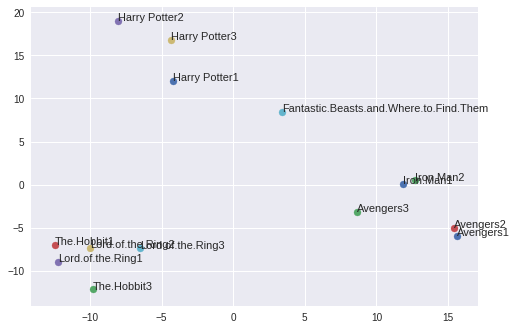

In [13]:
# visualize
plt.figure()
for i, movie_name in enumerate(model.docvecs.index2entity):
  x = movie_vectors_2d[i].transpose()[0]
  y = movie_vectors_2d[i].transpose()[1]
  plt.scatter(x, y)
  plt.text(x + 0.01,y + 0.01, movie_name, fontsize=11)
plt.show()